In [1]:
%matplotlib inline

In [2]:
from math import sqrt

from skimage import data
from skimage.color import rgb2gray

from skimage.feature import blob_dog, blob_log, blob_doh

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
from numpy import interp
from numpy import invert

In [3]:
im = data.hubble_deep_field()[0:500, 0:500]
im = rgb2gray(im)

In [4]:
#_datadir = "/media/gigi/NASPG/BTData/Jul2012_CMOS_data/MT9V011_Firenze_2012_07_13/01_MT9V011_017_G01_200ms_3MeV/"
_datadir = "/media/gigi/NASPG/BTData/Jul2012_CMOS_data/MT9V011_Firenze_2012_07_13/16_MT9V011_017_G01_050ms_3MeV_-60/"

In [5]:
%pwd

'/home/gigi/Work/CMOS'

In [5]:
#_fileprefix = "01_MT9V011_017_G01_200ms_3MeV_"
_fileprefix = "16_MT9V011_017_G01_050ms_3MeV_-60_"
_filenum = "00002"
_filesuffix = "_fr0000.txt"

filename = _datadir+_fileprefix+_filenum+_filesuffix

im = interp(np.loadtxt(filename,dtype="int"),[0,1024],[0,1]).reshape(480,640)

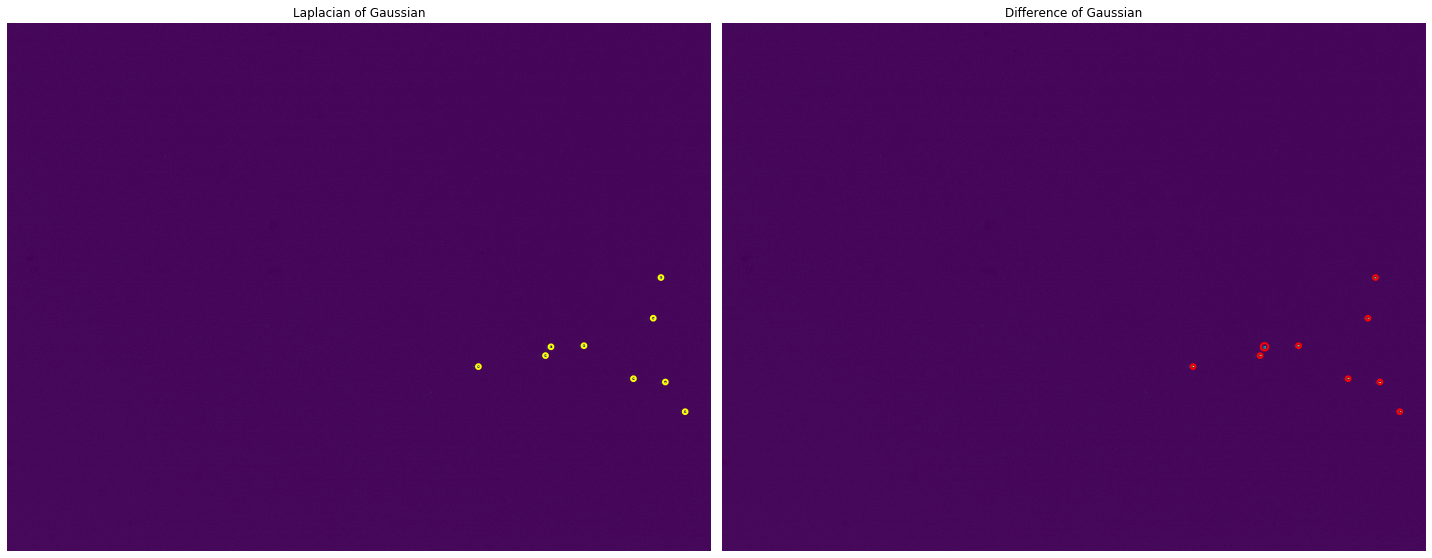

In [9]:
blobs_log = blob_log(im, max_sigma=50, num_sigma=10, threshold=.05)
blobs_log[:, 2] = blobs_log[:, 2] * 1.5 * sqrt(2)

blobs_dog = blob_dog(im, max_sigma=50, threshold=.05)
blobs_dog[:, 2] = blobs_dog[:, 2] * 1.5 * sqrt(2)

blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [10]:
blobs_log

array([[353.        , 616.        ,   2.12132034],
       [326.        , 598.        ,   2.12132034],
       [323.        , 569.        ,   2.12132034],
       [312.        , 428.        ,   2.12132034],
       [302.        , 489.        ,   2.12132034],
       [294.        , 494.        ,   2.12132034],
       [293.        , 524.        ,   2.12132034],
       [268.        , 587.        ,   2.12132034],
       [231.        , 594.        ,   2.12132034]])

In [11]:
blobs_dog

array([[353.        , 616.        ,   2.12132034],
       [326.        , 598.        ,   2.12132034],
       [323.        , 569.        ,   2.12132034],
       [312.        , 428.        ,   2.12132034],
       [302.        , 489.        ,   2.12132034],
       [294.        , 493.        ,   3.39411255],
       [293.        , 524.        ,   2.12132034],
       [268.        , 587.        ,   2.12132034],
       [231.        , 594.        ,   2.12132034]])

In [18]:
y1 = blobs_dog[0][0]
x1 = blobs_dog[0][1]
r1 = blobs_dog[0][2]

y2 = blobs_dog[1][0]
x2 = blobs_dog[1][1]
r2 = blobs_dog[1][2]

sqrt((x1-x2)**2 + (y1-y2)**2)


32.449961479175904

In [35]:
low_x = blobs_dog[0][0].astype(dtype="int") - blobs_dog[0][2].astype(dtype="int")
high_x = blobs_dog[0][0].astype(dtype="int") + blobs_dog[0][2].astype(dtype="int")

low_y = blobs_dog[0][1].astype(dtype="int") - blobs_dog[0][2].astype(dtype="int")
high_y = blobs_dog[0][1].astype(dtype="int") + blobs_dog[0][2].astype(dtype="int")


In [45]:
im[low_x:high_x][low_y:high_y]

array([], shape=(0, 640), dtype=float64)

In [58]:
np.sum(im[0:1][0])

45.5224609375

In [53]:
im[0][0]+im[1][0]

0.146484375

In [73]:
im[0][0:10]

array([0.07324219, 0.07128906, 0.0703125 , 0.0703125 , 0.0703125 ,
       0.07226562, 0.07519531, 0.07226562, 0.07324219, 0.07128906])